In [2]:
import numpy as np
import pandas as pd
import sys,os
import pylab
from scipy import stats,signal,io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import pickle
import seaborn as sns
sns.set_style('white')

In [3]:
folder = '/Users/guitchounts/Dropbox (coxlab)/Ephys/Data/GRat32/636397133447345980/'

In [7]:
from scipy.stats import pearsonr

In [6]:
def get_R2(y_test,y_test_pred):
    y_mean=np.mean(y_test)
    R2=1-np.sum((y_test_pred-y_test)**2)/np.sum((y_test-y_mean)**2)
    return R2

In [4]:
y_names = ['xyz','oz','dx','dy','dz','ax','ay','az','ox','oy','theta']

In [8]:
y_tests = [] 
y_predictions = []
R2s = []
rs = []

for i in range(len(y_names)):
    head_file = np.load(folder + '%s_LSTM_ypredicted.npz' % y_names[i] )
    y_tests.append(head_file['y_test'])
    y_predictions.append(head_file['y_prediction'])
    R2s.append(get_R2(head_file['y_test'],head_file['y_prediction']))
    rs.append(pearsonr(head_file['y_test'],head_file['y_prediction'])[0])

In [9]:
import matplotlib.gridspec as gridspec

In [26]:
def plot_results(valids,predictions,y_name,R2s,r,model_name='GRU'):

    num_figs = len(valids)
    

    f = plt.figure(dpi=600,figsize=(7,num_figs))
    
    
    gs = gridspec.GridSpec(num_figs, 7)
    
    for i in range(num_figs):
        y_valid = valids[i]
        y_valid_predicted = predictions[i]
        
        
        ax1 = plt.subplot(gs[i, 0:4])
        ax2 = plt.subplot(gs[i, 4])
        ax3 = plt.subplot(gs[i, 5:])

        axarr = [ax1,ax2,ax3]

        #axarr[0].set_title(model_name +' Model of %s.' % y_name[i])
        axarr[0].plot(y_valid,linewidth=0.1,c='black')
        axarr[0].set_ylabel(y_name[i])
        axarr[0].plot(y_valid_predicted,linewidth=0.1,color='red')    
        axarr[0].set_title('R^2 = %f. r = %f' % (R2s[i],r[i]),fontsize= 12)
        
        
        axarr[1].scatter(y_valid,y_valid_predicted,alpha=0.05,s=2,marker='o')
           
        axarr[1].axis('equal')
        axarr[1].axes.xaxis.set_ticklabels([])
        axarr[1].axes.yaxis.set_ticklabels([])
        
        axarr[2].hist(y_valid,bins=100,color='black',alpha=.5)
        axarr[2].hist(y_valid_predicted,bins=100,color='red',alpha=.5)
        #axarr[2].set_xlabel(y_name[i])
        axarr[2].axes.xaxis.set_ticklabels([])
        axarr[2].axes.yaxis.set_ticklabels([])
        

        if i == num_figs-1:
            axarr[0].set_xlabel('Time (samples)')
            axarr[1].set_xlabel('Actual')
            axarr[1].set_ylabel('Predicted')
        else:
            axarr[0].axes.xaxis.set_ticklabels([])
            
        
    sns.despine(left=True,bottom=True)
    
    plt.tight_layout()
    
    f.savefig(model_name + '.pdf')
    

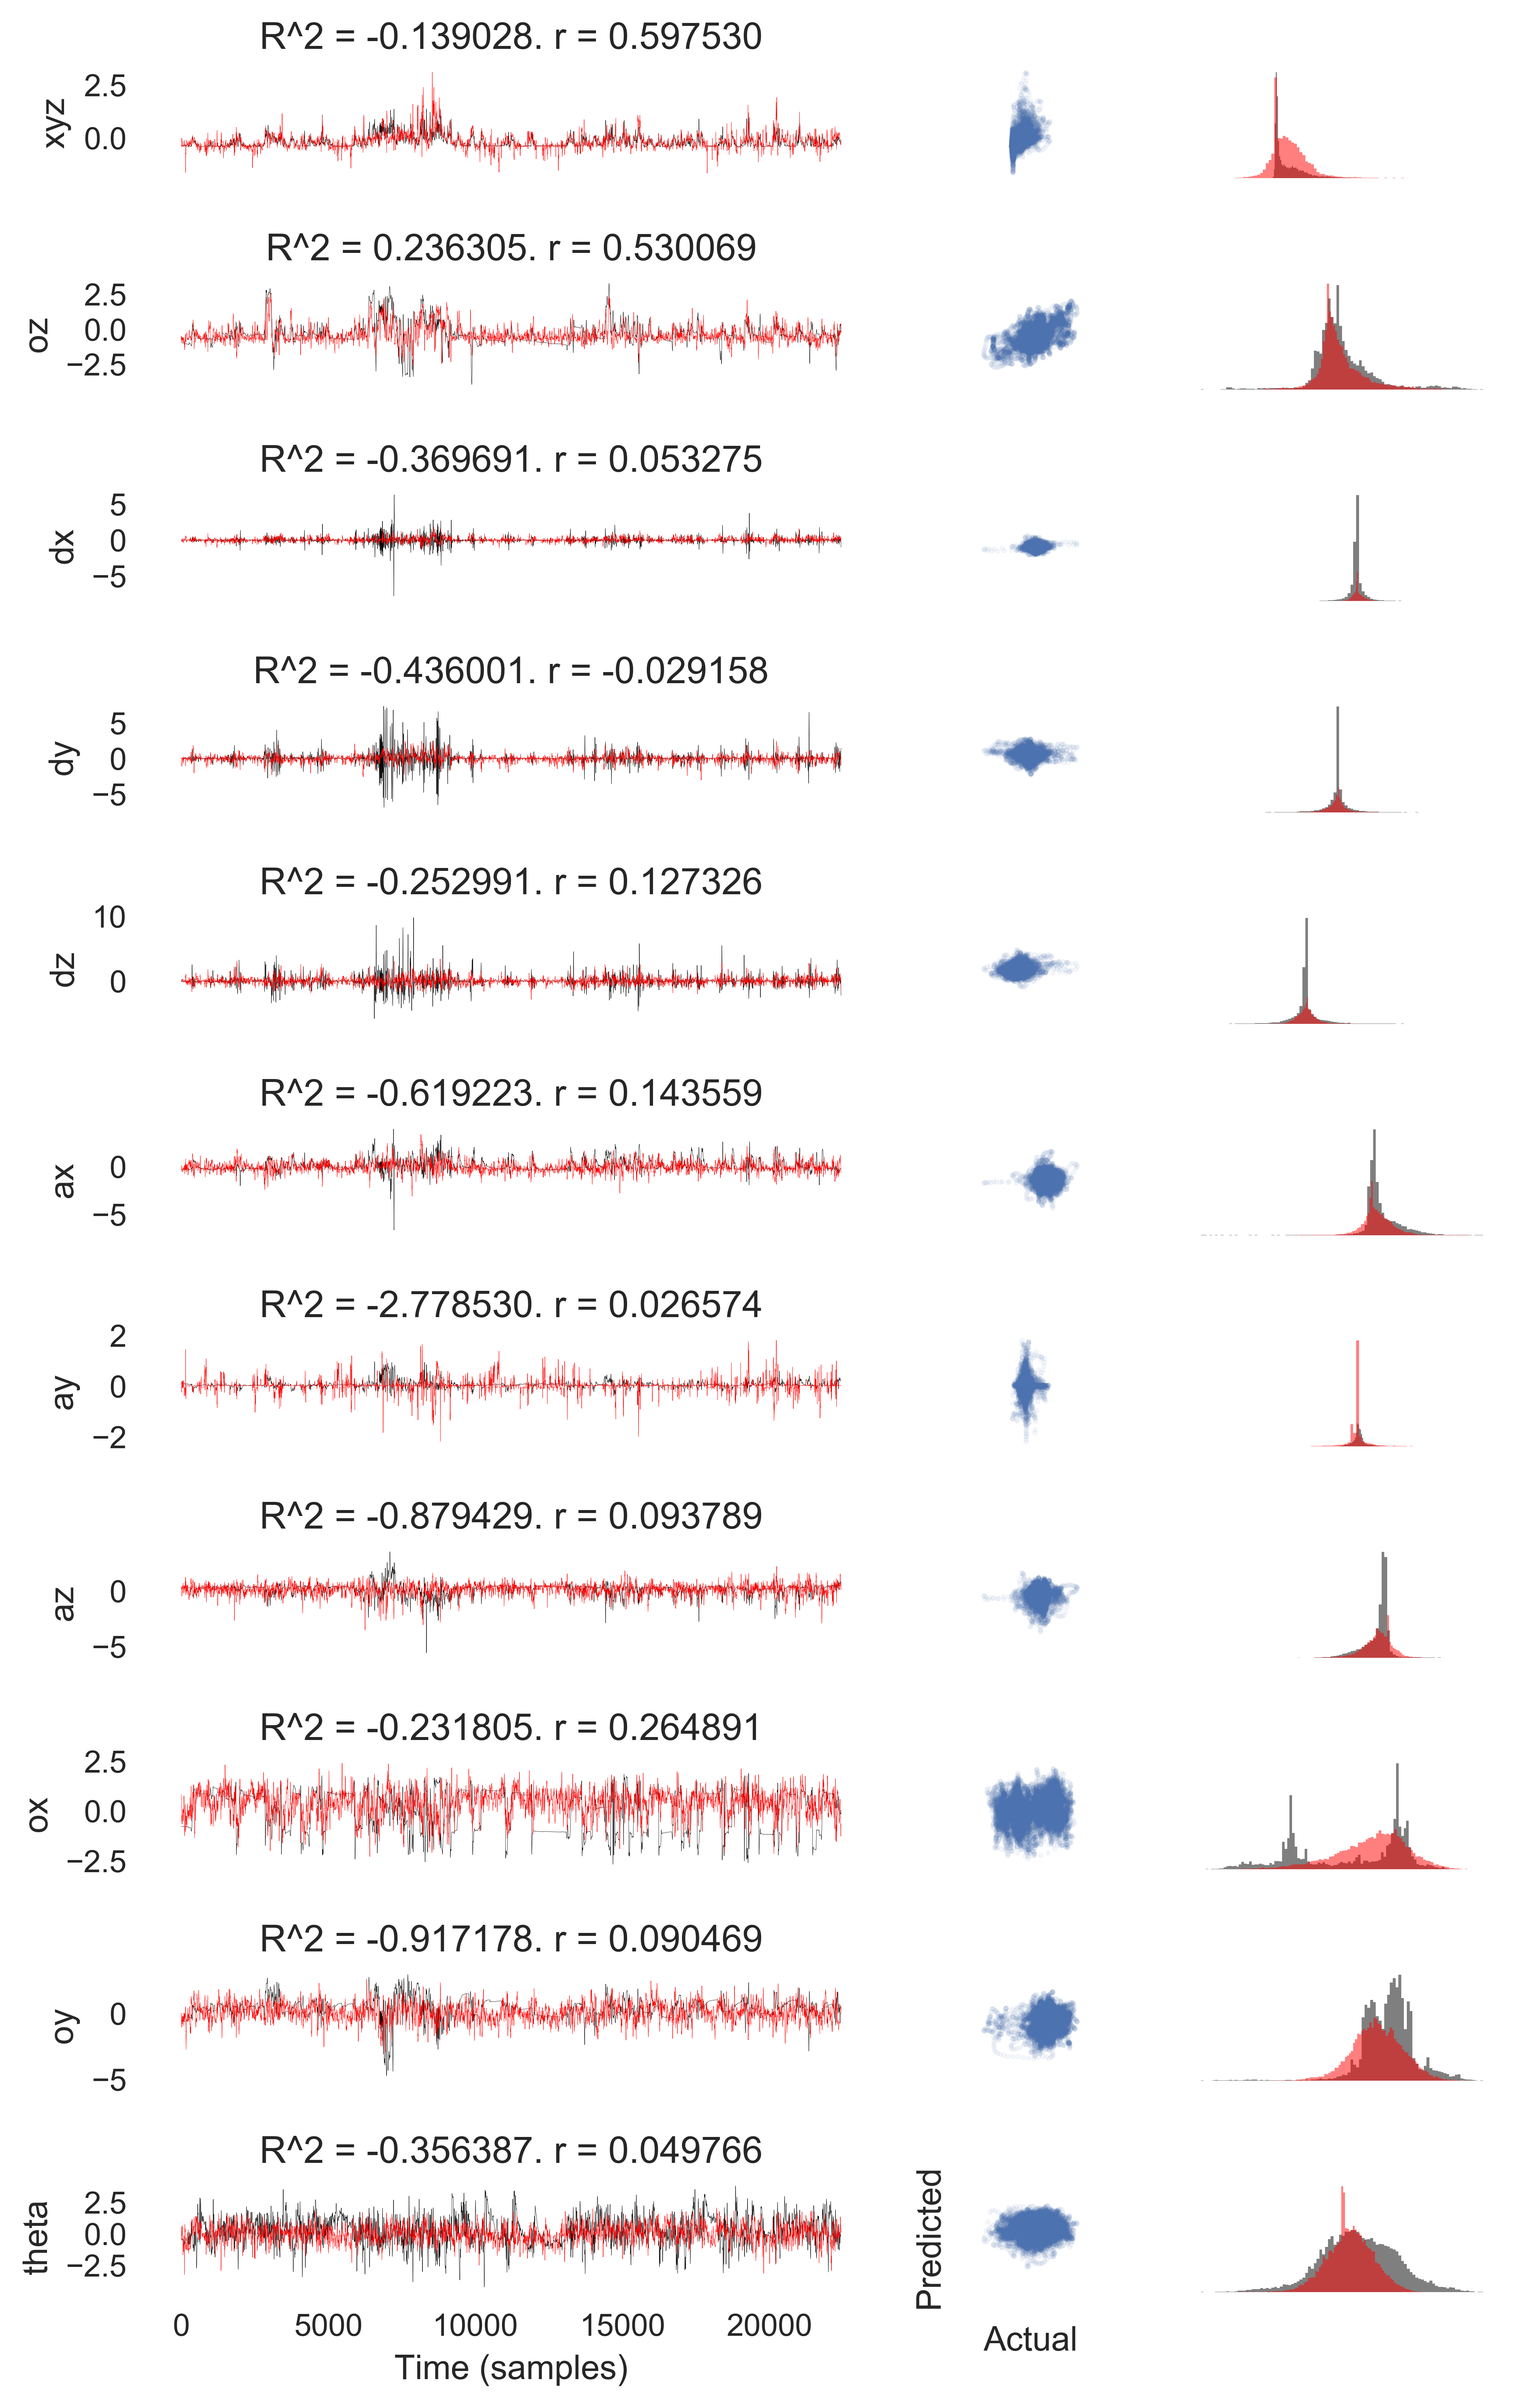

In [27]:
plot_results(y_tests,y_predictions,y_names,R2s,rs)

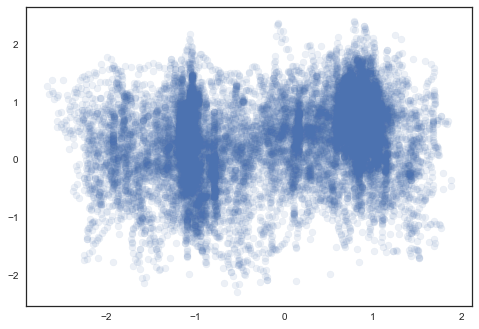

In [39]:
plt.scatter(y_tests[8],y_predictions[8],alpha=.1)

In [52]:
pearsonr(y_tests[8],y_predictions[8])

(array([ 0.26489089]), array([ 0.]))

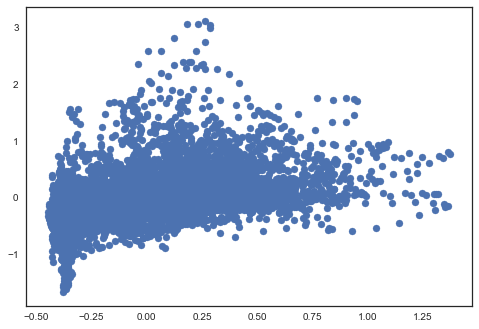

In [6]:
plt.scatter(xyz_test,xyz_prediction)

In [47]:
R2 = get_R2(xyz_test,xyz_prediction)

In [48]:
R2

-0.13902787329378019

In [49]:
xyz_test.mean()

-0.19386915969318602

In [50]:
xyz_prediction.mean()

-0.16859552

In [13]:
pearsonr(xyz_test,xyz_prediction)

(array([ 0.59753018]), array([ 0.]))

In [15]:
np.corrcoef(xyz_test.T,xyz_prediction.T)

array([[ 1.        ,  0.59753018],
       [ 0.59753018,  1.        ]])

NameError: name 'model_name' is not defined

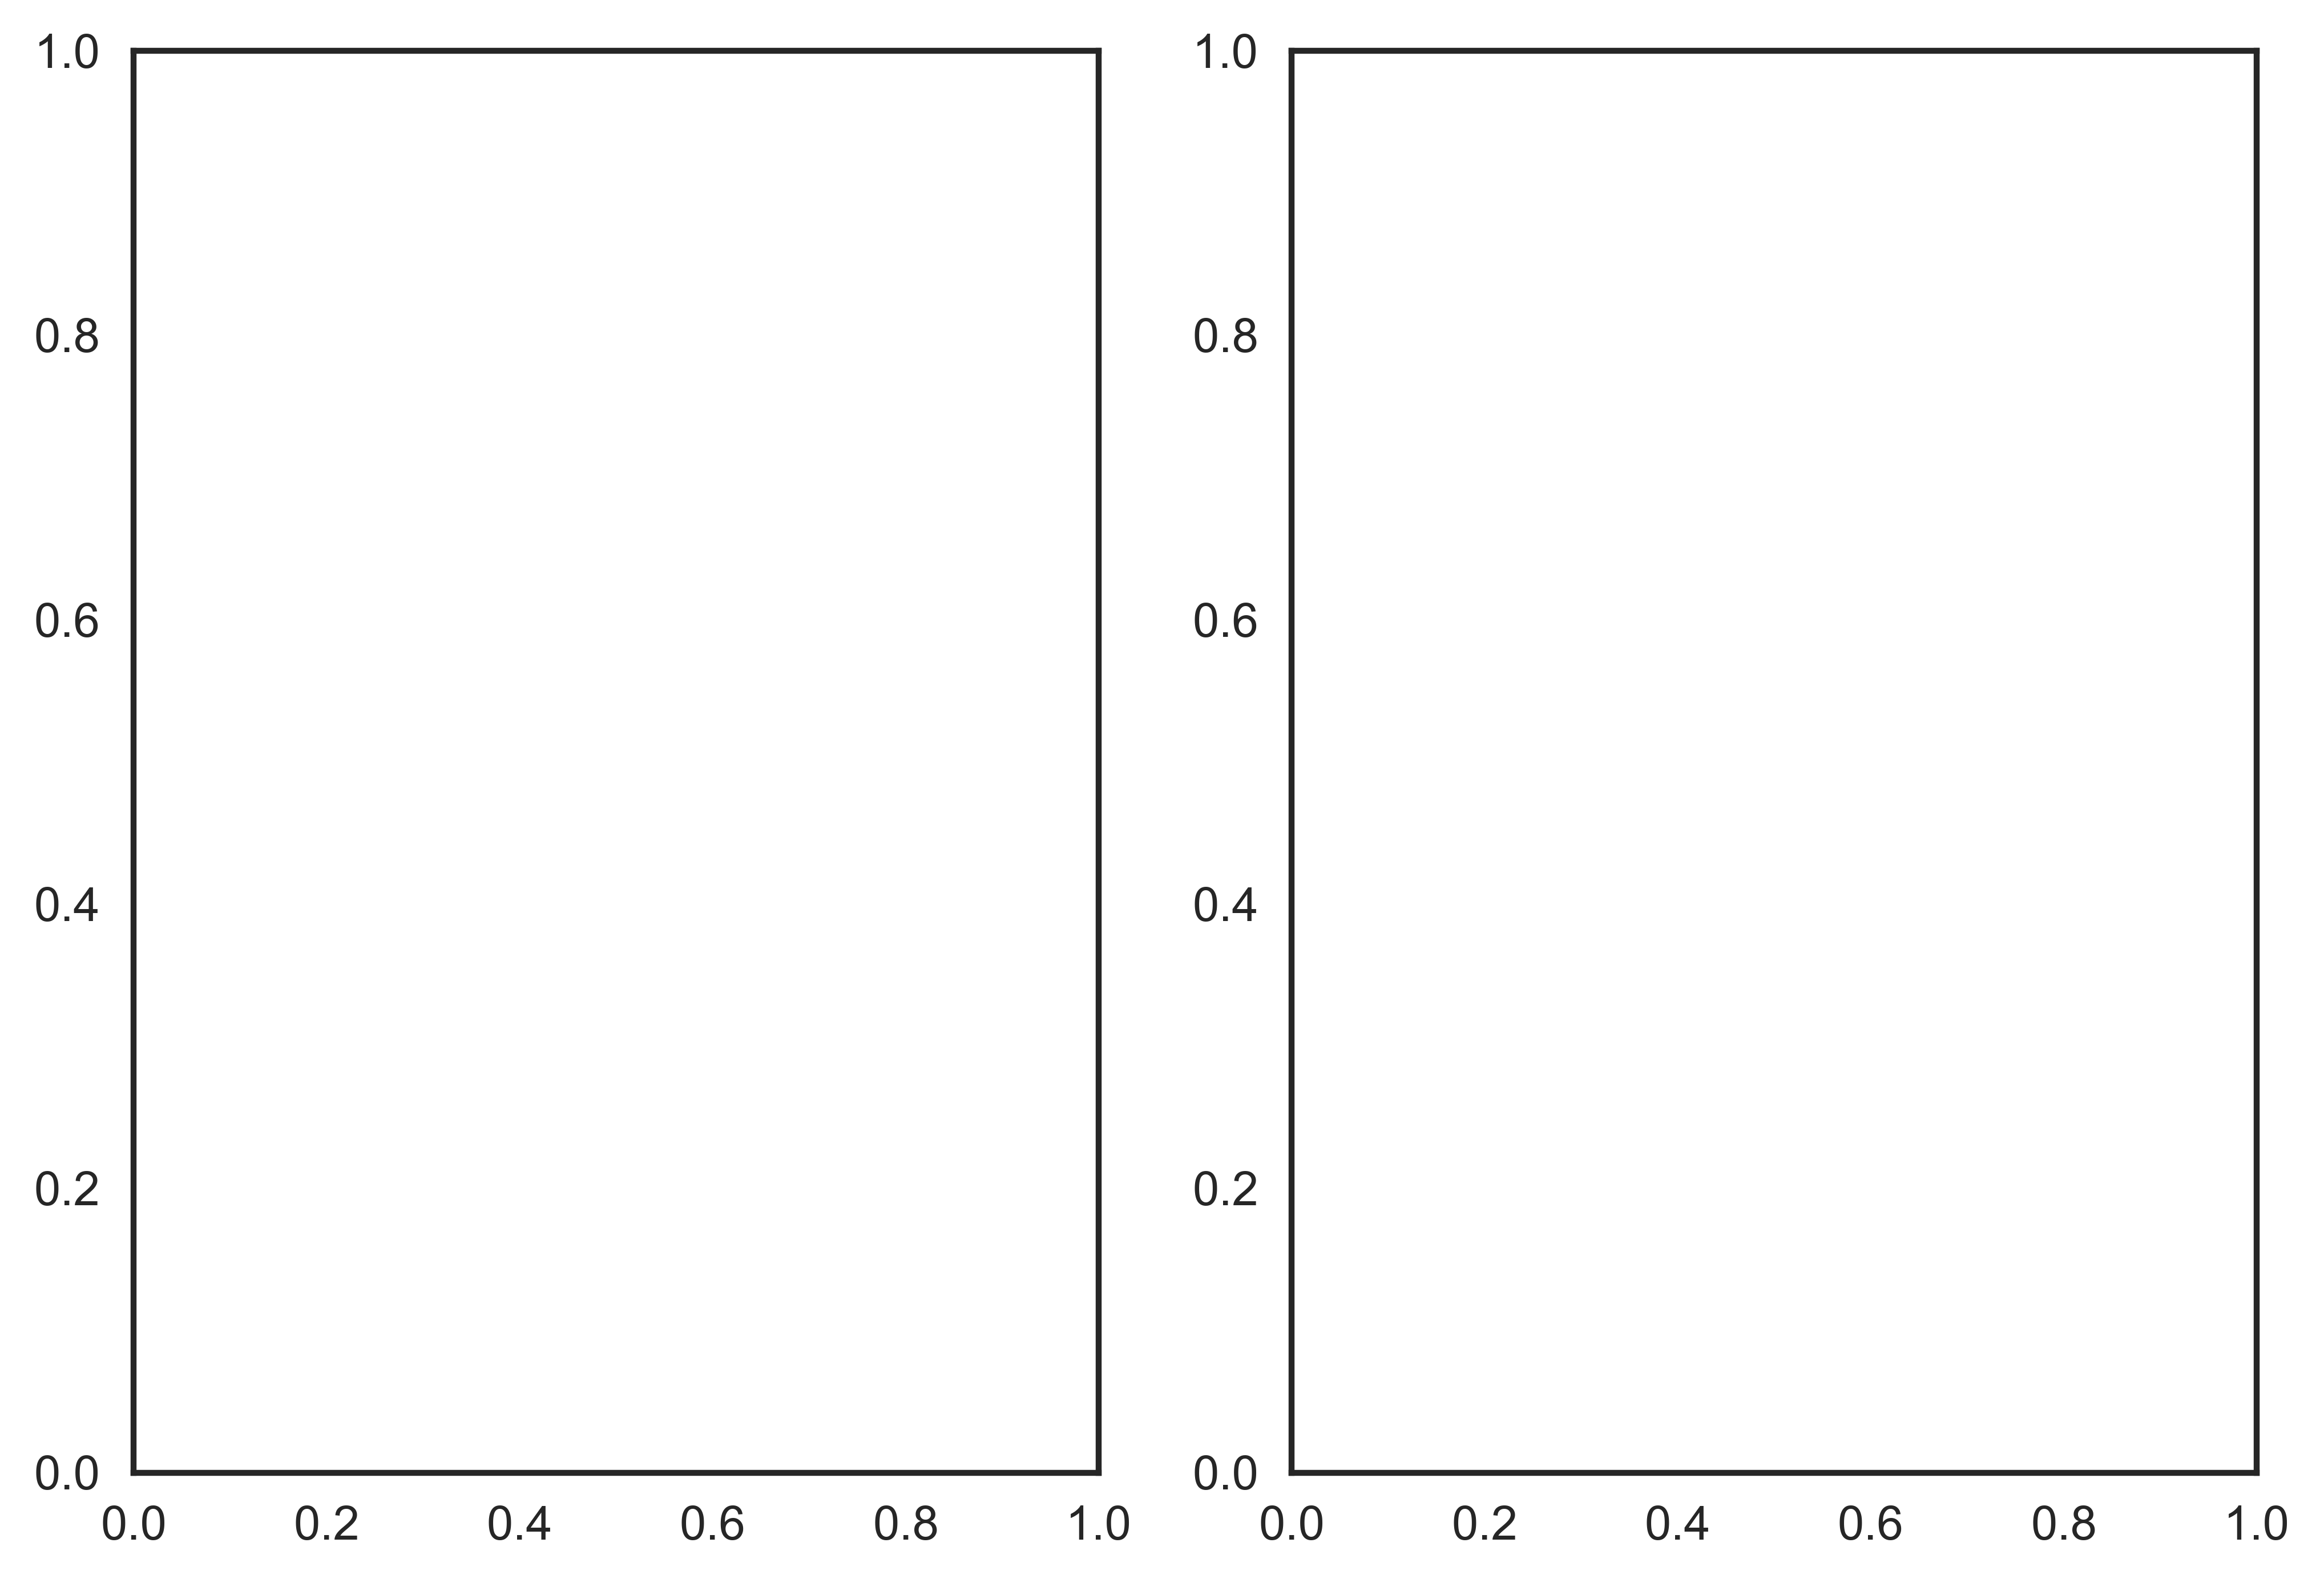

In [59]:
fig, axarr = plt.subplots(nrows=1, ncols=2,dpi=600)

axarr[0].set_title(model_name +' Model of %s. R^2 = %f ' % (y_name,R2s))


axarr[0].plot(y_valid,linewidth=0.1)
axarr[0].set_ylabel('Head Data')

axarr[0].plot(y_valid_predicted,linewidth=0.1,color='red')

#axarr[1].set_title(params)
axarr[1].scatter(y_valid,y_valid_predicted,alpha=0.05,marker='o')
#axarr[1].set_title('R2 = ' + str(R2s))
axarr[1].set_xlabel('Actual')
axarr[1].set_ylabel('Predicted')
axarr[1].axis('equal')

sns.despine(left=True,bottom=True)

#plt.tight_layout()